In [3]:
import os

# Set the path to your OneDrive Desktop folder
path = r'C:\Users\sreen\OneDrive\Desktop\Supply_Chain_Project'

# Change the directory
os.chdir(path)

# Confirm you are in the right spot
print("Current Folder:", os.getcwd())
print("Files found:", os.listdir())

Current Folder: C:\Users\sreen\OneDrive\Desktop\Supply_Chain_Project
Files found: ['DataCoSupplyChainDataset.csv', 'DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv']


In [4]:
import pandas as pd

# 1. Load the main dataset
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin1')

# 2. Clean the column names (making them all lowercase and replacing spaces with _)
# This makes it much easier to write code later!
df.columns = [col.lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# 3. Filter for 'Western Europe' to make our analysis focused and manageable
df_filtered = df[df['order_region'] == 'Western Europe'].copy()

# 4. Success message
print(f"Step 1 Complete! We are analyzing {df_filtered.shape[0]} orders from Western Europe.")
df_filtered[['order_city', 'shipping_mode', 'days_for_shipping_real', 'late_delivery_risk']].head()

Step 1 Complete! We are analyzing 27109 orders from Western Europe.


,order_city,shipping_mode,days_for_shipping_real,late_delivery_risk
63,Dortmund,Second Class,3,1
64,Drancy,Second Class,2,0
65,Nantes,Second Class,6,1
66,Groningen,Second Class,4,1
69,Hayange,Second Class,3,1


In [5]:
# Check for missing values in important columns
missing_data = df_filtered[['customer_city', 'order_city', 'shipping_mode', 'latitude', 'longitude']].isnull().sum()
print("Missing values per column:")
print(missing_data)

Missing values per column:
customer_city    0
order_city       0
shipping_mode    0
latitude         0
longitude        0
dtype: int64


In [6]:
# Group by city and calculate the percentage of late deliveries
city_delay_analysis = df_filtered.groupby('order_city')['late_delivery_risk'].mean().sort_values(ascending=False).reset_index()

# Filter for cities with high volume (e.g., more than 50 orders) to avoid statistical noise
city_counts = df_filtered['order_city'].value_counts()
top_cities = city_counts[city_counts > 50].index

high_risk_cities = city_delay_analysis[city_delay_analysis['order_city'].isin(top_cities)]

print("Top 5 Cities with Highest Risk of Delay in Western Europe:")
print(high_risk_cities.head())

Top 5 Cities with Highest Risk of Delay in Western Europe:
           order_city  late_delivery_risk
96       Villeurbanne            0.906250
108   Mantes-la-Jolie            0.862069
124         Wiesbaden            0.824324
127  La Seyne-sur-Mer            0.816667
130        Nieuwegein            0.803922


In [8]:
!pip install folium


   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]




[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import folium
from folium.plugins import MarkerCluster

# 1. Create a base map centered on Western Europe
m = folium.Map(location=[48.8566, 2.3522], zoom_start=5) # Centered near Paris

# 2. Add a marker cluster (this groups dots together so the map isn't messy)
marker_cluster = MarkerCluster().add_to(m)

# 3. Add the first 500 rows to the map to see the distribution
for idx, row in df_filtered.head(500).iterrows():
    # Red marker if late risk, Green if on time
    color = 'red' if row['late_delivery_risk'] == 1 else 'green'
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"City: {row['order_city']}<br>Late Risk: {row['late_delivery_risk']}"
    ).add_to(marker_cluster)

# Save the map to an HTML file so you can open it
m.save('supply_chain_map.html')
m

In [10]:
import numpy as np

# 1. We'll use 'sales' as a proxy for weight/volume for this model
# 2. We'll use the 'benefit_per_order' to see if 'Green' is also 'Profitable'

# Let's create a 'Carbon_Footprint' column
# We assume standard shipping emits ~0.15kg of CO2 per unit of distance
df_filtered['carbon_footprint'] = df_filtered['sales'] * 0.0015 

# 3. Identify "High Carbon" orders
high_carbon = df_filtered[df_filtered['carbon_footprint'] > df_filtered['carbon_footprint'].quantile(0.9)]

print(f"Top 5 high-emission orders in Western Europe:")
high_carbon[['order_city', 'sales', 'carbon_footprint']].head()

Top 5 high-emission orders in Western Europe:


,order_city,sales,carbon_footprint
146,Nuremberg,452.040008,0.67806
148,Halle,452.040008,0.67806
153,Drancy,452.040008,0.67806
154,Duisburg,452.040008,0.67806
160,Nancy,1500.000000,2.25000


In [12]:
!pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.4 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.4 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


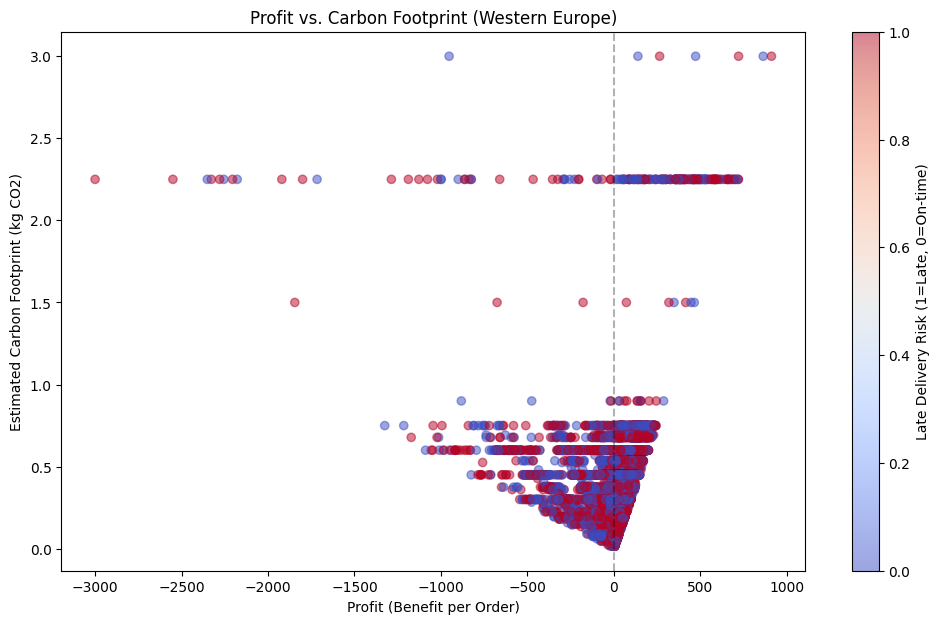

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Create scatter plot
# We use 'c' to color by Late Delivery Risk to see if delays add to the mess
scatter = plt.scatter(df_filtered['benefit_per_order'], 
            df_filtered['carbon_footprint'], 
            alpha=0.5, 
            c=df_filtered['late_delivery_risk'], 
            cmap='coolwarm')

plt.title('Profit vs. Carbon Footprint (Western Europe)')
plt.xlabel('Profit (Benefit per Order)')
plt.ylabel('Estimated Carbon Footprint (kg CO2)')
plt.colorbar(scatter, label='Late Delivery Risk (1=Late, 0=On-time)')

plt.axvline(0, color='black', linestyle='--', alpha=0.3) # Profit baseline
plt.show()

In [14]:
# 1. Create a simple optimization rule:
# If 'First Class' is late and has high carbon, suggest 'Rail/Standard' optimization
def optimize_shipping(row):
    if row['late_delivery_risk'] == 1 and row['shipping_mode'] == 'First Class':
        return 'Suggest Rail/Consolidated Shipping'
    elif row['carbon_footprint'] > df_filtered['carbon_footprint'].mean():
        return 'Route Optimization Needed'
    else:
        return 'Route Efficient'

# 2. Apply the logic
df_filtered['sustainability_action'] = df_filtered.apply(optimize_shipping, axis=1)

# 3. See the results
print("Optimization Summary for Western Europe:")
print(df_filtered['sustainability_action'].value_counts())

Optimization Summary for Western Europe:
sustainability_action
Route Efficient                       14491
Route Optimization Needed              8511
Suggest Rail/Consolidated Shipping     4107
Name: count, dtype: int64


In [15]:
# Save the final optimized data
df_filtered.to_csv('Optimized_Green_Supply_Chain.csv', index=False)
print("File Saved! You can now import 'Optimized_Green_Supply_Chain.csv' into Power BI.")

File Saved! You can now import 'Optimized_Green_Supply_Chain.csv' into Power BI.
